#### Explanation of Word Mover's Distance
Imagine you have a box of different colored LEGO blocks, and each color represents a word. Now, let's say you want to build two towers out of these blocks, but the towers look a little different from each other.

The **Word Mover's Distance (WMD)** is like figuring out the smallest number of steps it would take to move the blocks around so that one tower looks exactly like the other one. In this case, the blocks are words, and the steps are how different the words are from each other.

For example, if one tower has a red block (representing the word "cat") and the other has a pink block (representing the word "kitten"), it wouldn't take many steps to swap them because they’re pretty similar. But if it was a red block ("cat") and a blue block ("car"), it would take more steps since those words are less related.

The WMD algorithm does this for all the words in two sentences to see how "close" the meanings of the sentences are. If it takes just a few steps, the sentences mean almost the same thing. If it takes a lot of steps, the meanings are quite different.

In [4]:
import numpy as np
import gensim
from gensim.models import KeyedVectors
from sklearn.metrics import pairwise_distances
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords
nltk.download('stopwords')
print("Libraries imported and NLTK stopwords downloaded.")

Libraries imported and NLTK stopwords downloaded.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
# Path to preprocessed GloVe Word2Vec file
word2vec_path = r"C:\Users\KIIT\PycharmProjects\JupyterProject\data\glove.6B.100d.word2vec.txt"

# Load keyed vectors
glove_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=False)
print("Preprocessed GloVe embeddings loaded successfully.")

Preprocessed GloVe embeddings loaded successfully.


In [6]:
# Define stopwords
stop_words = set(stopwords.words('english'))

def preprocess(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove punctuation and numbers
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    # Tokenize into words
    words = sentence.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

print("Text preprocessing function defined.")

Text preprocessing function defined.


In [7]:
# Path to original dataset
original_dataset_path = r"C:\Users\KIIT\PycharmProjects\JupyterProject\data\sentence_pairs.txt"

# Path to reformatted dataset
reformatted_dataset_path = r"C:\Users\KIIT\PycharmProjects\JupyterProject\data\sentence_pairs_reformatted.txt"

# Reformat dataset
with open(original_dataset_path, 'r', encoding='utf-8') as infile, \
     open(reformatted_dataset_path, 'w', encoding='utf-8') as outfile:
    for line in infile:
        # Split into two sentences based on "Sentence B:"
        parts = line.strip().split("Sentence B:")
        if len(parts) == 2:
            sentence_a = parts[0].replace("Sentence A:", "").strip()
            sentence_b = parts[1].strip()
            outfile.write(f"{sentence_a}\t{sentence_b}\n")
        else:
            print(f"Skipping malformed line: {line.strip()}")

print("Dataset reformatted successfully.")

Dataset reformatted successfully.


In [8]:
# Path to dataset
dataset_path = r"C:\Users\KIIT\PycharmProjects\JupyterProject\data\sentence_pairs_reformatted.txt"

# Read sentence pairs
sentence_pairs = []
with open(dataset_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Strip whitespace and split by tab
        parts = line.strip().split('\t')

        # Ensure there are exactly two parts (sentence A and sentence B)
        if len(parts) == 2:
            sentence_a, sentence_b = parts
            sentence_pairs.append((sentence_a, sentence_b))
        else:
            print(f"Skipping malformed line: {line.strip()}")

print(f"Dataset loaded successfully with {len(sentence_pairs)} valid sentence pairs.")

Dataset loaded successfully with 50 valid sentence pairs.


In [9]:
def calculate_wmd(sentence_a, sentence_b):
    # Preprocess sentences
    words_a = preprocess(sentence_a)
    words_b = preprocess(sentence_b)

    # Print the list of words being passed to the model
    print(f"Sentence A: {sentence_a}")
    print(f"Processed Words A: {words_a}")
    print(f"Sentence B: {sentence_b}")
    print(f"Processed Words B: {words_b}")

    # Calculate WMD
    if len(words_a) == 0 or len(words_b) == 0:
        print("One or both sentences have no valid words after preprocessing. Skipping...")
        return None

    wmd_distance = glove_model.wmdistance(words_a, words_b)
    print(f"Word Movers Distance: {wmd_distance:.4f}\n")
    return wmd_distance

# Calculate WMD for all sentence pairs
results = []
for idx, (sentence_a, sentence_b) in enumerate(sentence_pairs, start=1):
    print(f"Processing Pair {idx}:")
    wmd_score = calculate_wmd(sentence_a, sentence_b)
    results.append((sentence_a, sentence_b, wmd_score))

Processing Pair 1:
Sentence A: 1.  The cat sleeps on the couch.
Processed Words A: ['cat', 'sleeps', 'couch']
Sentence B: A dog rests on the sofa.
Processed Words B: ['dog', 'rests', 'sofa']
Word Movers Distance: 0.8288

Processing Pair 2:
Sentence A: 2.  She enjoys reading books in the park.
Processed Words A: ['enjoys', 'reading', 'books', 'park']
Sentence B: He likes to read novels outdoors.
Processed Words B: ['likes', 'read', 'novels', 'outdoors']
Word Movers Distance: 0.9093

Processing Pair 3:
Sentence A: 3.  The weather is sunny today.
Processed Words A: ['weather', 'sunny', 'today']
Sentence B: It's a bright and clear day.
Processed Words B: ['bright', 'clear', 'day']
Word Movers Distance: 0.8642

Processing Pair 4:
Sentence A: 4.  I love eating pizza with friends.
Processed Words A: ['love', 'eating', 'pizza', 'friends']
Sentence B: My favorite food is pizza.
Processed Words B: ['favorite', 'food', 'pizza']
Word Movers Distance: 0.7091

Processing Pair 5:
Sentence A: 5.  The 

In [34]:
import csv
import os

# File paths
data_folder = r"C:\Users\KIIT\PycharmProjects\JupyterProject\data"
input_file = os.path.join(data_folder, "sentence_pairs_reformatted.txt")
output_file = os.path.join(data_folder, "wmd_results.csv")

# Read sentence pairs from file
sentence_pairs = []
with open(input_file, "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split("\t")  # Change "\t" to "," if CSV format
        if len(parts) == 2:  # Ensure valid pairs
            sentence_pairs.append((parts[0], parts[1]))

def calculate_wmd(sentence_a, sentence_b):
    words_a = preprocess(sentence_a)
    words_b = preprocess(sentence_b)

    print(f"Sentence A: {sentence_a}")
    print(f"Processed Words A: {words_a}")
    print(f"Sentence B: {sentence_b}")
    print(f"Processed Words B: {words_b}")

    if not words_a or not words_b:
        print("One or both sentences have no valid words after preprocessing. Skipping...\n")
        return None, None

    wmd_distance = glove_model.wmdistance(words_a, words_b)
    similarity_score = 1 / (1 + wmd_distance)

    print(f"Word Movers Distance: {wmd_distance:.4f}")
    print(f"Similarity Score: {similarity_score:.4f}\n")

    return wmd_distance, similarity_score

# Process all pairs
results = []
for idx, (sentence_a, sentence_b) in enumerate(sentence_pairs, start=1):
    print(f"Processing Pair {idx}:")
    wmd_score, similarity_score = calculate_wmd(sentence_a, sentence_b)
    results.append((sentence_a, sentence_b, wmd_score, similarity_score))

# Save results to CSV
with open(output_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Sentence A", "Sentence B", "WMD Distance", "Similarity Score"])
    writer.writerows(results)

print(f"Results saved to: {output_file}")


Processing Pair 1:
Sentence A: 1.  The cat sleeps on the couch.
Processed Words A: ['cat', 'sleeps', 'couch']
Sentence B: A dog rests on the sofa.
Processed Words B: ['dog', 'rests', 'sofa']
Word Movers Distance: 0.8288
Similarity Score: 0.5468

Processing Pair 2:
Sentence A: 2.  She enjoys reading books in the park.
Processed Words A: ['enjoys', 'reading', 'books', 'park']
Sentence B: He likes to read novels outdoors.
Processed Words B: ['likes', 'read', 'novels', 'outdoors']
Word Movers Distance: 0.9093
Similarity Score: 0.5237

Processing Pair 3:
Sentence A: 3.  The weather is sunny today.
Processed Words A: ['weather', 'sunny', 'today']
Sentence B: It's a bright and clear day.
Processed Words B: ['bright', 'clear', 'day']
Word Movers Distance: 0.8642
Similarity Score: 0.5364

Processing Pair 4:
Sentence A: 4.  I love eating pizza with friends.
Processed Words A: ['love', 'eating', 'pizza', 'friends']
Sentence B: My favorite food is pizza.
Processed Words B: ['favorite', 'food', 'pi

#### Explanation of Optimised Word Mover's Distance Algorithm
Imagine again that you have those LEGO towers, but now, you’re smarter about which blocks to move.

Let’s say some blocks have special stickers on them—like “NOUN” or “VERB”—to show what type of word they are, like naming things (NOUN, like “cat” or “dog”) or actions (VERB, like “run” or “jump”). You realize that some blocks are more important for building the tower’s shape than others.

For example, in the sentence “The cat is jumping,” the important words are “cat” (a NOUN) and “jumping” (a VERB). Words like “the” and “is” are like tiny connector blocks that don’t change the tower’s shape much.

So, in the **optimized Word Mover’s Distance (WMD)**, you decide to:
1. Focus mainly on the important blocks with stickers like NOUN (NN, NNS), VERB (VBG, VBZ), and ADJECTIVE (JJ).
2. Ignore or give less importance to tiny connector blocks like “the,” “is,” or “and” because they don’t change the meaning much.

By being picky about which blocks to move, you need fewer steps to make the towers look the same, and you get the answer faster! This is how the optimized version makes comparing sentence meanings quicker and more accurate.

In [10]:
import spacy
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import time

# Load SpaCy's English model for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Define stopwords
stop_words = set(stopwords.words('english'))

# Initialize WordNet Lemmatizer
lmtzr = WordNetLemmatizer()

print("Extra packages imported successfully.")

Extra packages imported successfully.


In [11]:
def preprocess_sentence(sentence):
    # Convert to lowercase and remove punctuation
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-z\s]', '', sentence)

    # Tokenize and extract words with specific POS tags
    doc = nlp(sentence)
    tag_list = ['NN', 'NNS', 'VBD', 'VBG', 'VBZ', 'VB']
    selected_words = [token.text for token in doc if token.tag_ in tag_list]

    # Remove stopwords
    selected_words = [word for word in selected_words if word not in stop_words]

    # Lemmatize words
    selected_words = [lmtzr.lemmatize(word, 'v') for word in selected_words]

    return selected_words

print("Preprocessing function defined.")

Preprocessing function defined.


In [12]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

# Initialize the lemmatizer
lmtzr = WordNetLemmatizer()

# Test lemmatization
print(lmtzr.lemmatize("running", 'v'))  # Output should be "run"
def calculate_owmd(sentence_a, sentence_b):
    # Preprocess sentences
    words_a = preprocess_sentence(sentence_a)
    words_b = preprocess_sentence(sentence_b)

    # Print the list of words being passed to the model
    print(f"Sentence A: {sentence_a}")
    print(f"Selected Words A: {words_a}")
    print(f"Sentence B: {sentence_b}")
    print(f"Selected Words B: {words_b}")

    # Calculate OWMD
    if len(words_a) == 0 or len(words_b) == 0:
        print("One or both sentences have no valid words after preprocessing. Skipping...")
        return None

    owmd_distance = glove_model.wmdistance(words_a, words_b)
    print(f"Optimized Word Movers Distance: {owmd_distance:.4f}\n")
    return owmd_distance

# Calculate OWMD for all sentence pairs
results = []
for idx, (sentence_a, sentence_b) in enumerate(sentence_pairs, start=1):
    print(f"Processing Pair {idx}:")
    owmd_score = calculate_owmd(sentence_a, sentence_b)
    results.append((sentence_a, sentence_b, owmd_score))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


run
Processing Pair 1:
Sentence A: 1.  The cat sleeps on the couch.
Selected Words A: ['cat', 'sleep', 'couch']
Sentence B: A dog rests on the sofa.
Selected Words B: ['dog', 'rest', 'sofa']
Optimized Word Movers Distance: 0.7678

Processing Pair 2:
Sentence A: 2.  She enjoys reading books in the park.
Selected Words A: ['enjoy', 'read', 'book', 'park']
Sentence B: He likes to read novels outdoors.
Selected Words B: ['like', 'read', 'novels']
Optimized Word Movers Distance: 0.7218

Processing Pair 3:
Sentence A: 3.  The weather is sunny today.
Selected Words A: ['weather', 'today']
Sentence B: It's a bright and clear day.
Selected Words B: ['day']
Optimized Word Movers Distance: 0.8302

Processing Pair 4:
Sentence A: 4.  I love eating pizza with friends.
Selected Words A: ['eat', 'pizza', 'friends']
Sentence B: My favorite food is pizza.
Selected Words B: ['food', 'pizza']
Optimized Word Movers Distance: 0.6661

Processing Pair 5:
Sentence A: 5.  The boy plays soccer in the yard.
Selec

In [36]:
import csv
import os
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

# Download required NLTK data
nltk.download('wordnet')

# Initialize the lemmatizer
lmtzr = WordNetLemmatizer()

# File paths
data_folder = r"C:\Users\KIIT\PycharmProjects\JupyterProject\data"
input_file = os.path.join(data_folder, "sentence_pairs_reformatted.txt")
output_file = os.path.join(data_folder, "owmd_results.csv")

# Read sentence pairs from file
sentence_pairs = []
with open(input_file, "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split("\t")  # Change "\t" to "," if CSV format
        if len(parts) == 2:
            sentence_pairs.append((parts[0], parts[1]))

def calculate_owmd(sentence_a, sentence_b):
    words_a = preprocess_sentence(sentence_a)  # Use lemmatization inside this function
    words_b = preprocess_sentence(sentence_b)

    print(f"Sentence A: {sentence_a}")
    print(f"Selected Words A: {words_a}")
    print(f"Sentence B: {sentence_b}")
    print(f"Selected Words B: {words_b}")

    if not words_a or not words_b:
        print("One or both sentences have no valid words after preprocessing. Skipping...\n")
        return None, None

    owmd_distance = glove_model.wmdistance(words_a, words_b)
    similarity_score = 1 / (1 + owmd_distance)  # Convert distance to similarity

    print(f"Optimized Word Movers Distance: {owmd_distance:.4f}")
    print(f"Similarity Score: {similarity_score:.4f}\n")

    return owmd_distance, similarity_score

# Process all pairs
results = []
for idx, (sentence_a, sentence_b) in enumerate(sentence_pairs, start=1):
    print(f"Processing Pair {idx}:")
    owmd_score, similarity_score = calculate_owmd(sentence_a, sentence_b)
    results.append((sentence_a, sentence_b, owmd_score, similarity_score))

# Save results to CSV
with open(output_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Sentence A", "Sentence B", "OWMD Distance", "Similarity Score"])
    writer.writerows(results)

print(f"Results saved to: {output_file}")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processing Pair 1:
Sentence A: 1.  The cat sleeps on the couch.
Selected Words A: ['cat', 'sleep', 'couch']
Sentence B: A dog rests on the sofa.
Selected Words B: ['dog', 'rest', 'sofa']
Optimized Word Movers Distance: 0.7678
Similarity Score: 0.5657

Processing Pair 2:
Sentence A: 2.  She enjoys reading books in the park.
Selected Words A: ['enjoy', 'read', 'book', 'park']
Sentence B: He likes to read novels outdoors.
Selected Words B: ['like', 'read', 'novels']
Optimized Word Movers Distance: 0.7218
Similarity Score: 0.5808

Processing Pair 3:
Sentence A: 3.  The weather is sunny today.
Selected Words A: ['weather', 'today']
Sentence B: It's a bright and clear day.
Selected Words B: ['day']
Optimized Word Movers Distance: 0.8302
Similarity Score: 0.5464

Processing Pair 4:
Sentence A: 4.  I love eating pizza with friends.
Selected Words A: ['eat', 'pizza', 'friends']
Sentence B: My favorite food is pizza.
Selected Words B: ['food', 'pizza']
Optimized Word Movers Distance: 0.6661
Simi

In [13]:
import pandas as pd
import numpy as np

# Original WMD and Optimized WMD values
original_wmd = [
    0.8288, 0.9093, 0.8642, 0.7091, 0.9616, 0.9414, 0.9951, 0.5238, 0.6899, 0.8994,
    0.9841, 0.9311, 0.9201, 0.9410, 0.9971, 0.8812, 1.0207, 0.8753, 1.0900, 1.0601,
    1.1504, 0.9402, 1.1475, 0.6398, 0.9013, 1.0620, 0.9559, 1.1098, 1.0171, 1.0829,
    1.0241, 0.9171, 0.7637, 1.1721, 0.9094, 1.0687, 1.0269, 0.9053, 0.9488, 1.0675,
    1.0990, 0.9791, 1.0207, 0.8794, 0.8975, 0.9980, 1.0765, 1.1079, 0.9790, 0.9977
]
optimized_wmd = [
    0.7678, 0.7218, 0.8302, 0.6661, 0.9197, 1.0028, 0.9973, 0.4347, 0.9448, 0.8420,
    0.9065, 0.7184, 0.9048, 0.9748, 0.9850, 0.9790, np.nan, 0.9443, 1.0928, 1.1591,
    1.1198, 0.8691, 1.1238, 0.4072, 1.0663, 0.9757, 0.9932, 0.9439, 0.9696, 0.7250,
    1.0603, 0.9348, 0.8715, 1.0420, 0.9062, 1.0736, 1.0544, 0.9343, 1.0563, 1.0674,
    1.1758, 0.9396, 0.9631, 0.7145, 0.9640, 1.1832, 1.1198, 1.0658, 1.0530, 1.0115
]

# Create a DataFrame for comparison
data = {
    "Pair": range(1, len(original_wmd) + 1),
    "Original WMD": original_wmd,
    "Optimized WMD": optimized_wmd,
}

df = pd.DataFrame(data)

# Add columns to indicate if OWMD is better and why
df["OWMD Better?"] = df.apply(
    lambda row: "Yes" if pd.notna(row["Optimized WMD"]) and row["Optimized WMD"] < row["Original WMD"]
    else ("No" if pd.notna(row["Optimized WMD"]) else "N/A"),
    axis=1
)

# Count how many times OWMD is better
owmd_better_count = df[df["OWMD Better?"] == "Yes"].shape[0]
wmd_better_count = df[df["OWMD Better?"] == "No"].shape[0]
not_comparable_count = df[df["OWMD Better?"] == "N/A"].shape[0]

# Display the DataFrame
print("Comparison of WMD and OWMD:")
print(df[["Pair", "Original WMD", "Optimized WMD", "OWMD Better?"]])

# Summary
print("\nSummary:")
print(f"OWMD is better than WMD in {owmd_better_count} pairs (OWMD distance is less).")
print(f"WMD is better than OWMD in {wmd_better_count} pairs (OWMD distance is greater or equal).")
print(f"Not comparable in {not_comparable_count} pair (OWMD is not computable).")

# Justification for Yes/No/N/A at the end
print("\nJustification:")
print("- 'Yes': OWMD distance is less than WMD.")
print("- 'No': OWMD distance is greater than or equal to WMD.")
print("- 'N/A': OWMD is not computable (value is NaN).")

Comparison of WMD and OWMD:
    Pair  Original WMD  Optimized WMD OWMD Better?
0      1        0.8288         0.7678          Yes
1      2        0.9093         0.7218          Yes
2      3        0.8642         0.8302          Yes
3      4        0.7091         0.6661          Yes
4      5        0.9616         0.9197          Yes
5      6        0.9414         1.0028           No
6      7        0.9951         0.9973           No
7      8        0.5238         0.4347          Yes
8      9        0.6899         0.9448           No
9     10        0.8994         0.8420          Yes
10    11        0.9841         0.9065          Yes
11    12        0.9311         0.7184          Yes
12    13        0.9201         0.9048          Yes
13    14        0.9410         0.9748           No
14    15        0.9971         0.9850          Yes
15    16        0.8812         0.9790           No
16    17        1.0207            NaN          N/A
17    18        0.8753         0.9443           No
18 

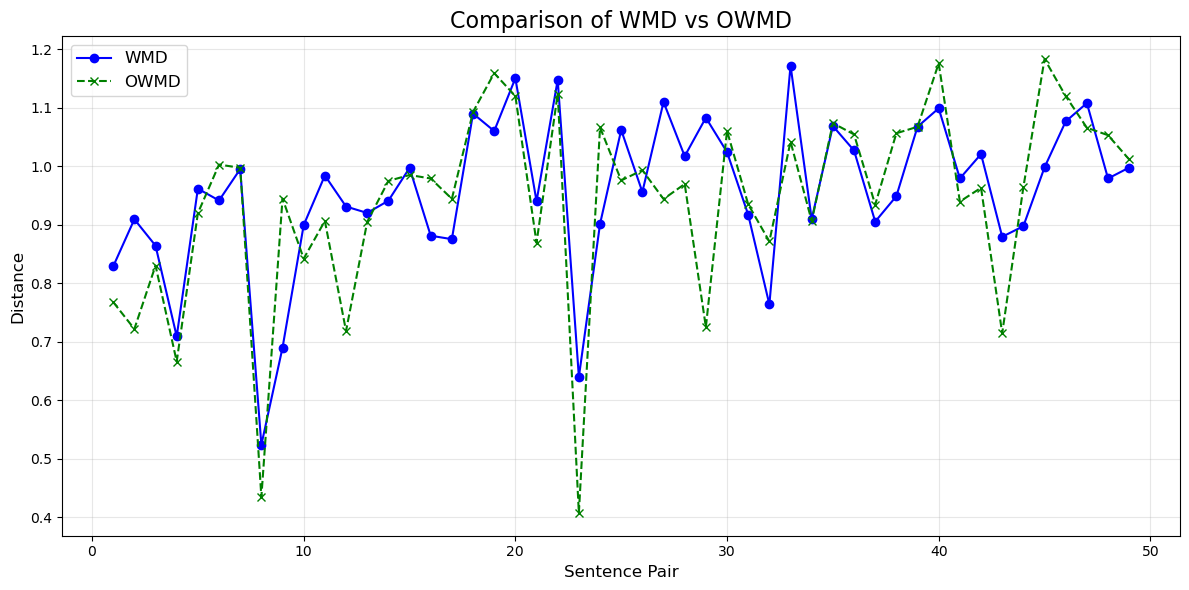

In [14]:
import matplotlib.pyplot as plt

# Original WMD and Optimized WMD values
original_wmd = [
    0.8288, 0.9093, 0.8642, 0.7091, 0.9616, 0.9414, 0.9951, 0.5238, 0.6899, 0.8994,
    0.9841, 0.9311, 0.9201, 0.9410, 0.9971, 0.8812, 1.0207, 0.8753, 1.0900, 1.0601,
    1.1504, 0.9402, 1.1475, 0.6398, 0.9013, 1.0620, 0.9559, 1.1098, 1.0171, 1.0829,
    1.0241, 0.9171, 0.7637, 1.1721, 0.9094, 1.0687, 1.0269, 0.9053, 0.9488, 1.0675,
    1.0990, 0.9791, 1.0207, 0.8794, 0.8975, 0.9980, 1.0765, 1.1079, 0.9790, 0.9977
]
optimized_wmd = [
    0.7678, 0.7218, 0.8302, 0.6661, 0.9197, 1.0028, 0.9973, 0.4347, 0.9448, 0.8420,
    0.9065, 0.7184, 0.9048, 0.9748, 0.9850, 0.9790, None, 0.9443, 1.0928, 1.1591,
    1.1198, 0.8691, 1.1238, 0.4072, 1.0663, 0.9757, 0.9932, 0.9439, 0.9696, 0.7250,
    1.0603, 0.9348, 0.8715, 1.0420, 0.9062, 1.0736, 1.0544, 0.9343, 1.0563, 1.0674,
    1.1758, 0.9396, 0.9631, 0.7145, 0.9640, 1.1832, 1.1198, 1.0658, 1.0530, 1.0115
]

# Remove None values for visualization
valid_indices = [i for i, value in enumerate(optimized_wmd) if value is not None]
original_wmd_valid = [original_wmd[i] for i in valid_indices]
optimized_wmd_valid = [optimized_wmd[i] for i in valid_indices]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot WMD curve
plt.plot(range(1, len(original_wmd_valid) + 1), original_wmd_valid, label="WMD", marker='o', linestyle='-', color='blue')

# Plot OWMD curve
plt.plot(range(1, len(optimized_wmd_valid) + 1), optimized_wmd_valid, label="OWMD", marker='x', linestyle='--', color='green')

# Add labels and title
plt.title("Comparison of WMD vs OWMD", fontsize=16)
plt.xlabel("Sentence Pair", fontsize=12)
plt.ylabel("Distance", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

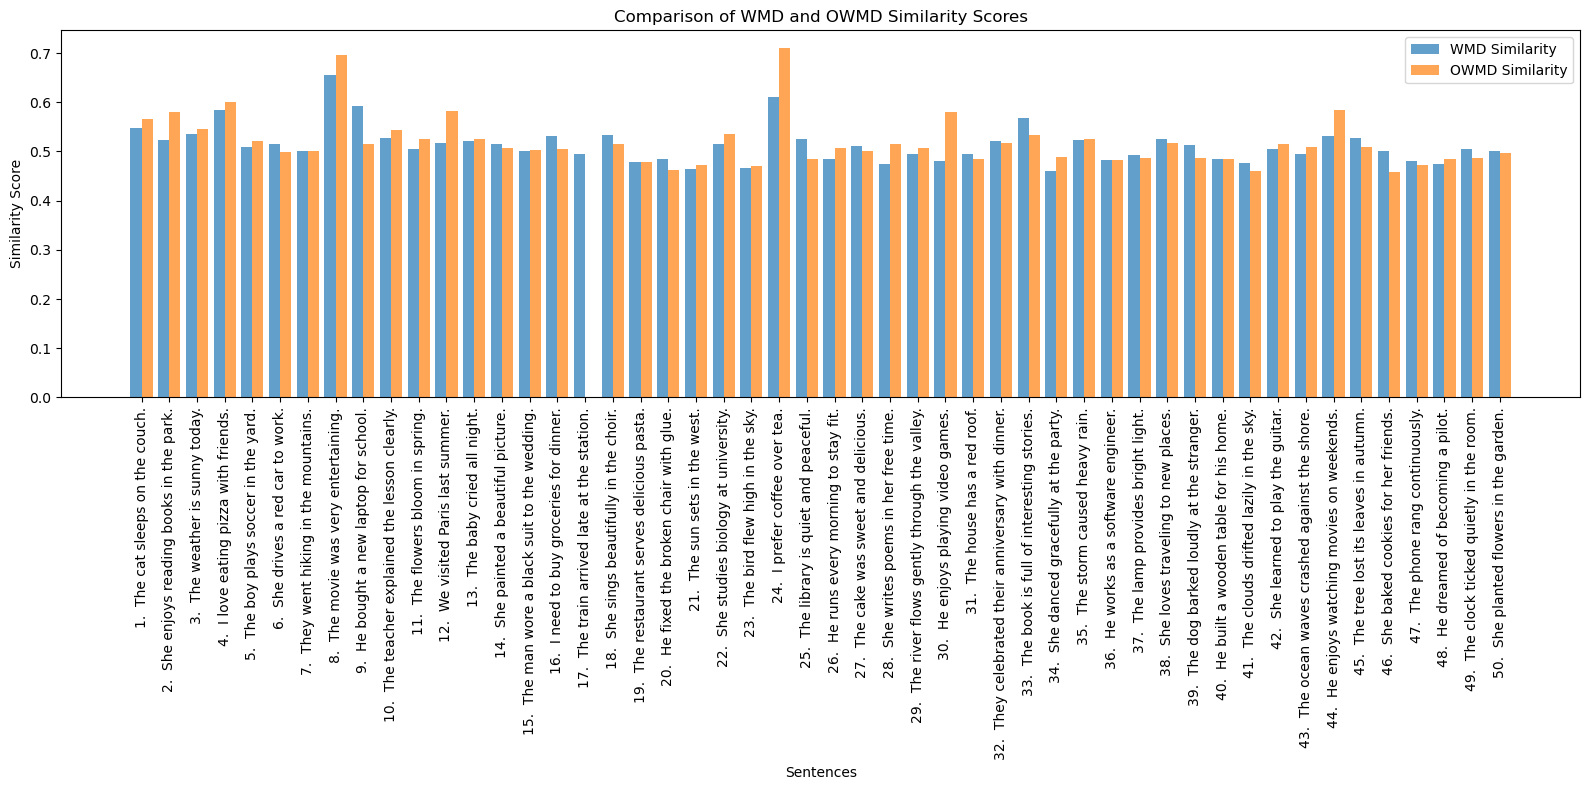

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
wmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\wmd_results.csv'
owmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\owmd_results.csv'

# Load the data from the CSV files
wmd_data = pd.read_csv(wmd_file_path)
owmd_data = pd.read_csv(owmd_file_path)

# Extracting the WMD and OWMD Similarity Scores for comparison
wmd_similarity = wmd_data['Similarity Score']
owmd_similarity = owmd_data['Similarity Score']
sentences = wmd_data['Sentence A']  # Assuming both files have the same sentences in the same order

# Creating a bar graph to compare the two results
x = range(len(sentences))

plt.figure(figsize=(16, 8))
plt.bar(x, wmd_similarity, width=0.4, label='WMD Similarity', align='center', alpha=0.7)
plt.bar([i + 0.4 for i in x], owmd_similarity, width=0.4, label='OWMD Similarity', align='center', alpha=0.7)

plt.xlabel('Sentences')
plt.ylabel('Similarity Score')
plt.title('Comparison of WMD and OWMD Similarity Scores')
plt.xticks([i + 0.2 for i in x], sentences, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


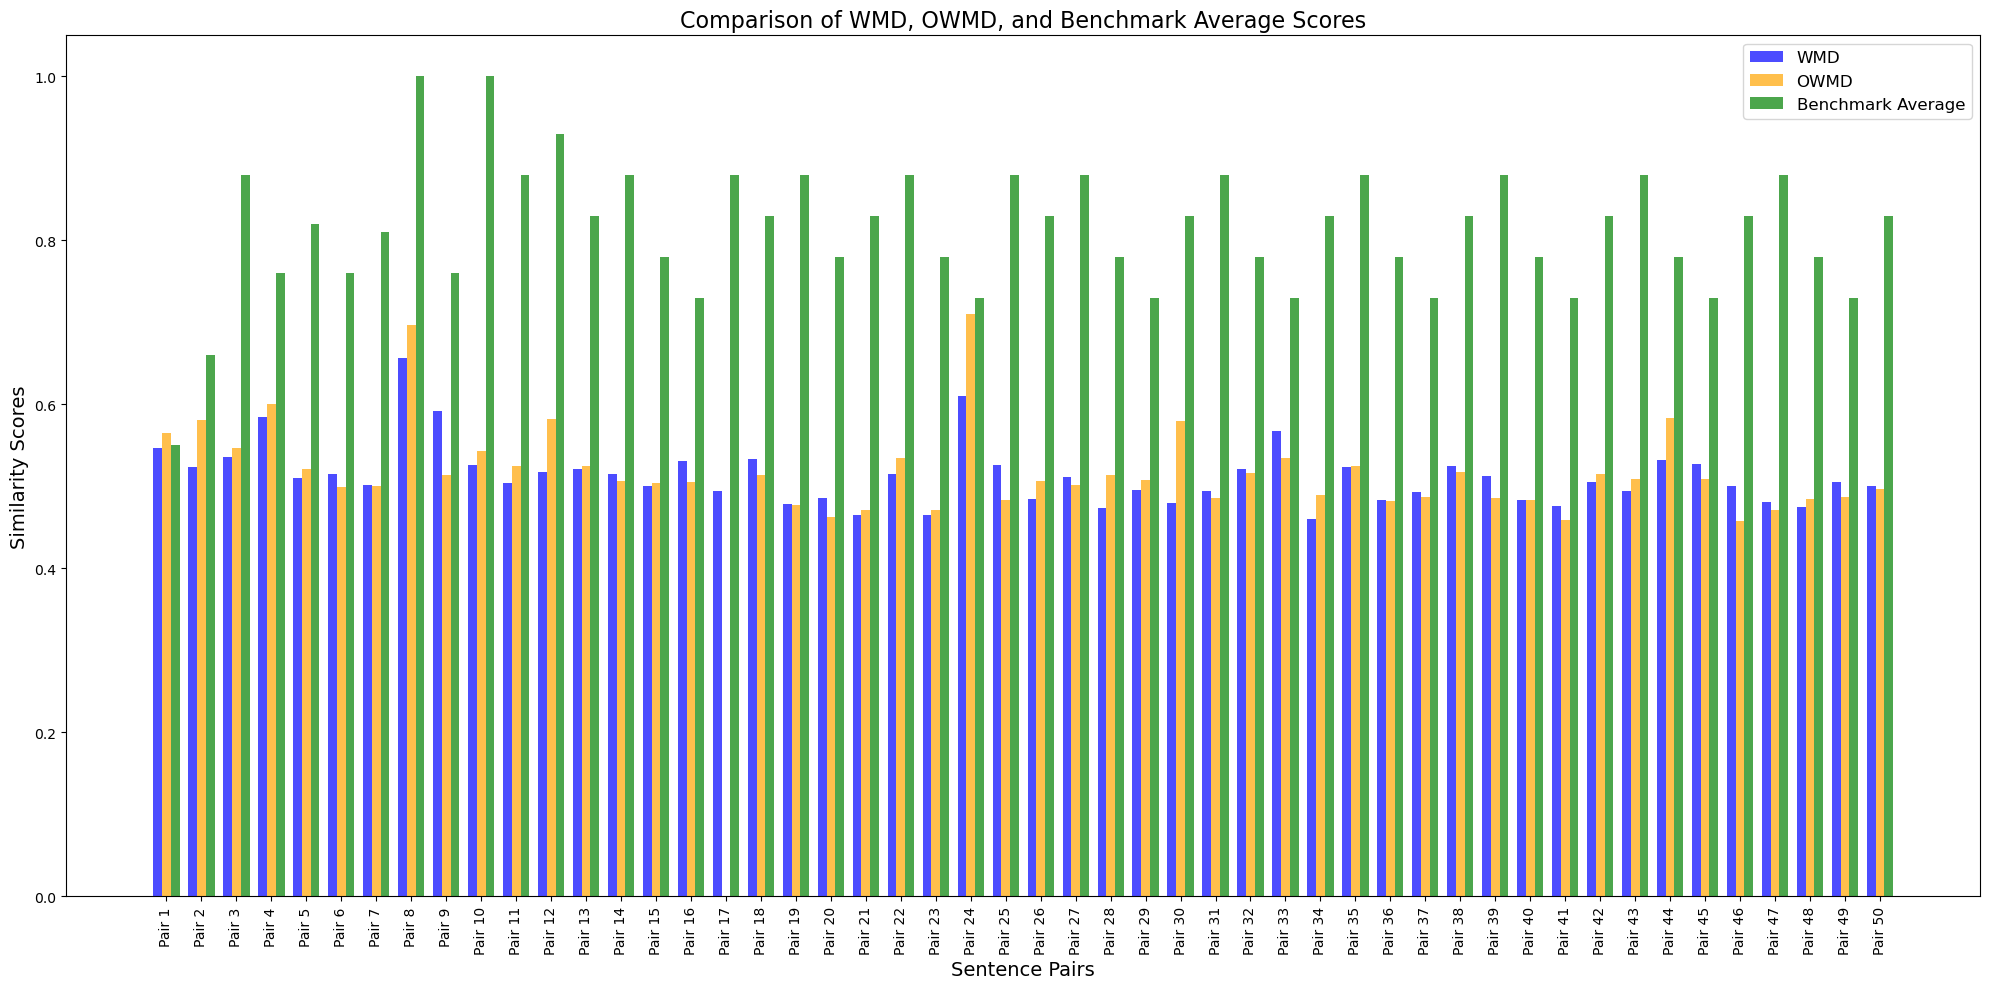

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
wmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\wmd_results.csv'
owmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\owmd_results.csv'
benchmark_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\similarity_scores.xlsx'

# Load WMD data
wmd_data = pd.read_csv(wmd_file_path)
wmd_scores = wmd_data['Similarity Score'].tolist()

# Load OWMD data
owmd_data = pd.read_csv(owmd_file_path)
owmd_scores = owmd_data['Similarity Score'].tolist()

# Load Benchmark Average Scores
benchmark_data = pd.read_excel(benchmark_file_path)
benchmark_scores = benchmark_data['Average'].tolist()

# Ensure all lists have the same length by truncating to the shortest list
min_length = min(len(wmd_scores), len(owmd_scores), len(benchmark_scores))
wmd_scores = wmd_scores[:min_length]
owmd_scores = owmd_scores[:min_length]
benchmark_scores = benchmark_scores[:min_length]

# Generate sentence pair labels
pairs = [f"Pair {i+1}" for i in range(min_length)]

# Plotting
x = np.arange(min_length)  # X-axis positions
bar_width = 0.25

plt.figure(figsize=(20, 10))

# Bar plots for WMD, OWMD, and Benchmark Average
plt.bar(x - bar_width, wmd_scores, bar_width, label='WMD', color='blue', alpha=0.7)
plt.bar(x, owmd_scores, bar_width, label='OWMD', color='orange', alpha=0.7)
plt.bar(x + bar_width, benchmark_scores, bar_width, label='Benchmark Average', color='green', alpha=0.7)

# Add labels and title
plt.xlabel("Sentence Pairs", fontsize=14)
plt.ylabel("Similarity Scores", fontsize=14)
plt.title("Comparison of WMD, OWMD, and Benchmark Average Scores", fontsize=16)
plt.xticks(x, pairs, rotation=90)
plt.legend(fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Word Mover Distance Algorithm in Bengali Language
FastText helps implement Word Mover's Distance (WMD) in Bengali by providing word embeddings that capture both the meaning and structure of words, even for rare or out-of-vocabulary terms. Unlike traditional word embeddings, FastText represents words as character n-grams, which is especially useful for Bengali due to its complex morphology and word variations. This ability to generate meaningful embeddings for a wide range of words makes it an ideal choice for calculating WMD in Bengali, allowing for more accurate text comparisons based on semantic similarity.

In [15]:
import re
import pandas as pd

# Set the file path for the Bengali dataset
file_path = r"C:\Users\KIIT\PycharmProjects\JupyterProject\data\BengaliDataset.txt"

# Read the dataset into a DataFrame, assuming each line has Sentence A and Sentence B separated by a TAB.
df = pd.read_csv(file_path, sep="\t", header=None, names=["Sentence1", "Sentence2"], encoding="utf-8")

print("Dataset loaded successfully!")
print("Dataset preview:")
print(df.head())


Dataset loaded successfully!
Dataset preview:
                                 Sentence1  \
0                             আমি বই পড়ি।   
1            সে বাজারে গিয়ে সবজি কিনেছিল।   
2                          আজ আকাশ স্পষ্ট।   
3  আমরা সাঁতার কাটতে জলের কাছে গিয়েছিলাম।   
4                 সে প্রতিদিন সকালে হাঁটে।   

                                        Sentence2  
0                        আমি গল্প পড়তে ভালোবাসি।  
1                     সে সেরা সবজি সংগ্রহ করেছিল।  
2                      আজ দিনটি একেবারে পরিষ্কার।  
3  আমরা পুকুরের ধারে সাঁতার কাটার মজা নিয়েছিলাম।  
4                সে দৈনিক হাঁটার অভ্যাস পোষণ করে।  


In [16]:
def tokenize_bengali(text):
    """
    Tokenizes Bengali text by removing punctuation and splitting by whitespace.
    You can extend this function to handle more punctuation or other cleaning.
    """
    # Remove some common punctuation (adjust as necessary)
    text_clean = re.sub(r'[।,?!]', '', text)
    tokens = text_clean.lower().split()
    return tokens

# Test tokenizer on a sample sentence
sample = df.iloc[0]["Sentence1"]
print("Sample Sentence:", sample)
print("Tokenized Sample:", tokenize_bengali(sample))


Sample Sentence: আমি বই পড়ি।
Tokenized Sample: ['আমি', 'বই', 'পড়ি']


In [17]:
from gensim.models import FastText

# Build a corpus by tokenizing both Sentence1 and Sentence2 of each pair.
corpus = []
for _, row in df.iterrows():
    corpus.append(tokenize_bengali(row["Sentence1"]))
    corpus.append(tokenize_bengali(row["Sentence2"]))

print("Total sentences in corpus:", len(corpus))
print("Example tokenized sentence from corpus:", corpus[0])

# Train a FastText model on the corpus.
fasttext_model = FastText(
    sentences=corpus,
    vector_size=50,   # Adjust vector size as needed
    window=3,
    min_count=1,      # Using min_count=1 because our dataset is small
    epochs=20
)

print("FastText model trained successfully!")
print("Vocabulary size:", len(fasttext_model.wv))


Total sentences in corpus: 240
Example tokenized sentence from corpus: ['আমি', 'বই', 'পড়ি']
FastText model trained successfully!
Vocabulary size: 494


In [18]:
def select_words(sentence, model):
    """
    Tokenizes the sentence and selects words that are present in the model's vocabulary.
    """
    tokens = tokenize_bengali(sentence)
    selected = [token for token in tokens if token in model.wv]
    return selected

def compute_wmd(words_a, words_b, model):
    """
    Computes the Word Mover's Distance between two lists of words using the model.
    Returns infinity if one of the lists is empty.
    """
    if words_a and words_b:
        return model.wv.wmdistance(words_a, words_b)
    else:
        return float("inf")
print("Computing Word Mover's Distance...")

Computing Word Mover's Distance...


In [19]:
# Process each sentence pair, display selected words and the WMD score.
for idx, row in df.iterrows():
    pair_num = idx + 1
    sent_a = row["Sentence1"]
    sent_b = row["Sentence2"]

    # Select words based on model vocabulary
    selected_words_a = select_words(sent_a, fasttext_model)
    selected_words_b = select_words(sent_b, fasttext_model)

    # Compute the Word Mover's Distance
    wmd_score = compute_wmd(selected_words_a, selected_words_b, fasttext_model)

    # Print detailed information for the current pair.
    print(f"Processing Pair {pair_num}:")
    print(f"Sentence A: {sent_a}")
    print(f"Selected Words A: {selected_words_a}")
    print(f"Sentence B: {sent_b}")
    print(f"Selected Words B: {selected_words_b}")
    if wmd_score == float("inf"):
        print("Word Mover's Distance: Infinity (Insufficient valid tokens)")
    else:
        print(f"Word Mover's Distance: {wmd_score:.4f}")
    print("-" * 50)


Processing Pair 1:
Sentence A: আমি বই পড়ি।
Selected Words A: ['আমি', 'বই', 'পড়ি']
Sentence B: আমি গল্প পড়তে ভালোবাসি।
Selected Words B: ['আমি', 'গল্প', 'পড়তে', 'ভালোবাসি']
Word Mover's Distance: 0.6919
--------------------------------------------------
Processing Pair 2:
Sentence A: সে বাজারে গিয়ে সবজি কিনেছিল।
Selected Words A: ['সে', 'বাজারে', 'গিয়ে', 'সবজি', 'কিনেছিল']
Sentence B: সে সেরা সবজি সংগ্রহ করেছিল।
Selected Words B: ['সে', 'সেরা', 'সবজি', 'সংগ্রহ', 'করেছিল']
Word Mover's Distance: 0.4666
--------------------------------------------------
Processing Pair 3:
Sentence A: আজ আকাশ স্পষ্ট।
Selected Words A: ['আজ', 'আকাশ', 'স্পষ্ট']
Sentence B: আজ দিনটি একেবারে পরিষ্কার।
Selected Words B: ['আজ', 'দিনটি', 'একেবারে', 'পরিষ্কার']
Word Mover's Distance: 0.5781
--------------------------------------------------
Processing Pair 4:
Sentence A: আমরা সাঁতার কাটতে জলের কাছে গিয়েছিলাম।
Selected Words A: ['আমরা', 'সাঁতার', 'কাটতে', 'জলের', 'কাছে', 'গিয়েছিলাম']
Sentence B: আমরা পুকুরে

### **Optimized Word Mover’s Distance (OWMD) on Bengali Text Using POS Tag-Based Classification**

<p align="justify">
Optimized Word Mover’s Distance (OWMD) is a refined version of Word Mover’s Distance (WMD) that improves similarity measurement between two text samples. In our approach, we apply OWMD to Bengali text by first performing tokenization and Part-of-Speech (POS) tagging using a Bengali POS tagger. To enhance accuracy, we classify words based on their POS tags, selecting <b>nouns (NN), verbs (VM), adjectives (JJ), and adverbs (RB)</b> as relevant words for similarity computation. If no such words exist, we fall back to using all tokens to avoid empty inputs that cause infinite distance values. We then compute the Word Mover’s Distance (WMD) using FastText word embeddings, followed by converting it into <b>Optimized Word Mover’s Similarity (OWMS) using an exponential function</b>. This process ensures a robust semantic similarity measurement, effectively handling Bengali linguistic structures while mitigating errors due to insufficient content-bearing words.
</p>


In [20]:
import nltk

# Download the Indian POS dataset (if not already downloaded)
nltk.download('indian')
nltk.download('punkt')
nltk.download('punkt_tab')
print("Completed")

[nltk_data] Downloading package indian to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package indian is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...


Completed


[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
# Load the tagged Bengali sentences from the NLTK Indian corpus
tagged_sents = nltk.corpus.indian.tagged_sents(fileids="bangla.pos")

# Train a Unigram POS Tagger
bengali_tagger = nltk.tag.UnigramTagger(tagged_sents)

print("Bengali POS Tagger is Ready!")


Bengali POS Tagger is Ready!


In [22]:
# Define the file path (Update this path if needed)
file_path = "C:\\Users\\KIIT\\PycharmProjects\\JupyterProject\\data\\BengaliDataset.txt"

# Read the dataset file
with open(file_path, "r", encoding="utf-8") as file:
    sentence_pairs = file.readlines()

print(f"Loaded {len(sentence_pairs)} sentence pairs from dataset.")


Loaded 120 sentence pairs from dataset.


In [23]:
# Process each sentence pair
for i, pair in enumerate(sentence_pairs):
    sentences = pair.strip().split("\t")  # Split by tab character

    if len(sentences) != 2:
        print(f"Skipping invalid pair {i+1}: {pair}")
        continue

    sentence_A, sentence_B = sentences

    # Tokenize and tag each sentence
    tagged_A = bengali_tagger.tag(nltk.word_tokenize(sentence_A))
    tagged_B = bengali_tagger.tag(nltk.word_tokenize(sentence_B))

    # Print results
    print(f"\nProcessing Pair {i+1}:")
    print(f"Sentence A: {sentence_A}")
    print(f"POS Tags A: {tagged_A}")

    print(f"Sentence B: {sentence_B}")
    print(f"POS Tags B: {tagged_B}")



Processing Pair 1:
Sentence A: আমি বই পড়ি।
POS Tags A: [('আমি', 'PRP'), ('বই', 'NN'), ('পড়ি।', None)]
Sentence B: আমি গল্প পড়তে ভালোবাসি।
POS Tags B: [('আমি', 'PRP'), ('গল্প', None), ('পড়তে', 'VM'), ('ভালোবাসি।', None)]

Processing Pair 2:
Sentence A: সে বাজারে গিয়ে সবজি কিনেছিল।
POS Tags A: [('সে', 'PRP'), ('বাজারে', None), ('গিয়ে', None), ('সবজি', 'NN'), ('কিনেছিল।', None)]
Sentence B: সে সেরা সবজি সংগ্রহ করেছিল।
POS Tags B: [('সে', 'PRP'), ('সেরা', None), ('সবজি', 'NN'), ('সংগ্রহ', 'NN'), ('করেছিল।', None)]

Processing Pair 3:
Sentence A: আজ আকাশ স্পষ্ট।
POS Tags A: [('আজ', 'NN'), ('আকাশ', 'NN'), ('স্পষ্ট।', None)]
Sentence B: আজ দিনটি একেবারে পরিষ্কার।
POS Tags B: [('আজ', 'NN'), ('দিনটি', None), ('একেবারে', 'RB'), ('পরিষ্কার।', None)]

Processing Pair 4:
Sentence A: আমরা সাঁতার কাটতে জলের কাছে গিয়েছিলাম।
POS Tags A: [('আমরা', 'PRP'), ('সাঁতার', None), ('কাটতে', 'VM'), ('জলের', 'NN'), ('কাছে', 'NST'), ('গিয়েছিলাম।', None)]
Sentence B: আমরা পুকুরের ধারে সাঁতার কাটার মজা নিয়

In [24]:
from gensim.models import FastText

# Build a corpus by tokenizing both Sentence1 and Sentence2 of each pair
corpus = []
for _, row in df.iterrows():
    corpus.append(tokenize_bengali(row["Sentence1"]))
    corpus.append(tokenize_bengali(row["Sentence2"]))

print("Total sentences in corpus:", len(corpus))
print("Example tokenized sentence from corpus:", corpus[0])

# Train a FastText model on the corpus
fasttext_model = FastText(
    sentences=corpus,
    vector_size=50,   # Adjust vector size as needed
    window=3,
    min_count=1,      # Using min_count=1 because our dataset is small
    epochs=20
)

print("FastText model trained successfully!")
print("Vocabulary size:", len(fasttext_model.wv))

Total sentences in corpus: 240
Example tokenized sentence from corpus: ['আমি', 'বই', 'পড়ি']
FastText model trained successfully!
Vocabulary size: 494


In [25]:
import nltk
import numpy as np

print("Libraries imported successfully!")


Libraries imported successfully!


In [26]:
def select_relevant_words(pos_tags):
    """
    Selects relevant words (nouns, verbs, adjectives, adverbs).
    Falls back to all tokens if no relevant words are found.
    """
    relevant_tags = {"NN", "VM", "JJ", "RB"}  # Content-bearing POS tags
    relevant_words = [word for word, tag in pos_tags if tag in relevant_tags]

    # If no relevant words found, use all words
    if not relevant_words:
        relevant_words = [word for word, _ in pos_tags]

    return relevant_words

print("select_relevant_words function defined successfully!")


select_relevant_words function defined successfully!


In [27]:
def compute_wmd(words_a, words_b, model):
    """
    Computes the Word Mover's Distance (WMD) between two lists of words using the model.
    Assumes both lists are non-empty due to preprocessing.
    """
    return model.wv.wmdistance(words_a, words_b)

print("compute_wmd function defined successfully!")


compute_wmd function defined successfully!


In [28]:
def compute_owms(owmd_score):
    """
    Converts OWMD dissimilarity score into OWMS similarity score using the exponential function.
    """
    return np.exp(-owmd_score)

print("compute_owms function defined successfully!")


compute_owms function defined successfully!


In [29]:
# Ensure df is already defined before running this block
print("Starting OWMD computation...")

for idx, row in df.iterrows():
    pair_num = idx + 1
    sent_a = row["Sentence1"]
    sent_b = row["Sentence2"]

    print(f"\nProcessing Pair {pair_num}:")

    # Tokenize and POS tag each sentence
    tokens_a = nltk.word_tokenize(sent_a)
    tokens_b = nltk.word_tokenize(sent_b)
    pos_tags_a = bengali_tagger.tag(tokens_a)
    pos_tags_b = bengali_tagger.tag(tokens_b)

    print(f"Sentence A: {sent_a}")
    print(f"POS Tags A: {pos_tags_a}")
    print(f"Sentence B: {sent_b}")
    print(f"POS Tags B: {pos_tags_b}")

    # Select relevant words based on expanded POS tags
    relevant_words_a = select_relevant_words(pos_tags_a)
    relevant_words_b = select_relevant_words(pos_tags_b)

    print(f"Relevant Words A: {relevant_words_a}")
    print(f"Relevant Words B: {relevant_words_b}")

    # Compute OWMD using the selected relevant words
    owmd_score = compute_wmd(relevant_words_a, relevant_words_b, fasttext_model)

    # Compute OWMS (Optimized Word Mover's Similarity)
    owms_score = compute_owms(owmd_score)

    # Print OWMD and OWMS results
    print(f"Optimized Word Mover's Distance (OWMD): {owmd_score:.4f}")
    print(f"Optimized Word Mover's Similarity (OWMS): {owms_score:.4f}")
    print("-" * 50)

print("OWMD computation completed!")


Starting OWMD computation...

Processing Pair 1:
Sentence A: আমি বই পড়ি।
POS Tags A: [('আমি', 'PRP'), ('বই', 'NN'), ('পড়ি।', None)]
Sentence B: আমি গল্প পড়তে ভালোবাসি।
POS Tags B: [('আমি', 'PRP'), ('গল্প', None), ('পড়তে', 'VM'), ('ভালোবাসি।', None)]
Relevant Words A: ['বই']
Relevant Words B: ['পড়তে']
Optimized Word Mover's Distance (OWMD): 1.1561
Optimized Word Mover's Similarity (OWMS): 0.3147
--------------------------------------------------

Processing Pair 2:
Sentence A: সে বাজারে গিয়ে সবজি কিনেছিল।
POS Tags A: [('সে', 'PRP'), ('বাজারে', None), ('গিয়ে', None), ('সবজি', 'NN'), ('কিনেছিল।', None)]
Sentence B: সে সেরা সবজি সংগ্রহ করেছিল।
POS Tags B: [('সে', 'PRP'), ('সেরা', None), ('সবজি', 'NN'), ('সংগ্রহ', 'NN'), ('করেছিল।', None)]
Relevant Words A: ['সবজি']
Relevant Words B: ['সবজি', 'সংগ্রহ']
Optimized Word Mover's Distance (OWMD): 0.5176
Optimized Word Mover's Similarity (OWMS): 0.5959
--------------------------------------------------

Processing Pair 3:
Sentence A: আজ আক

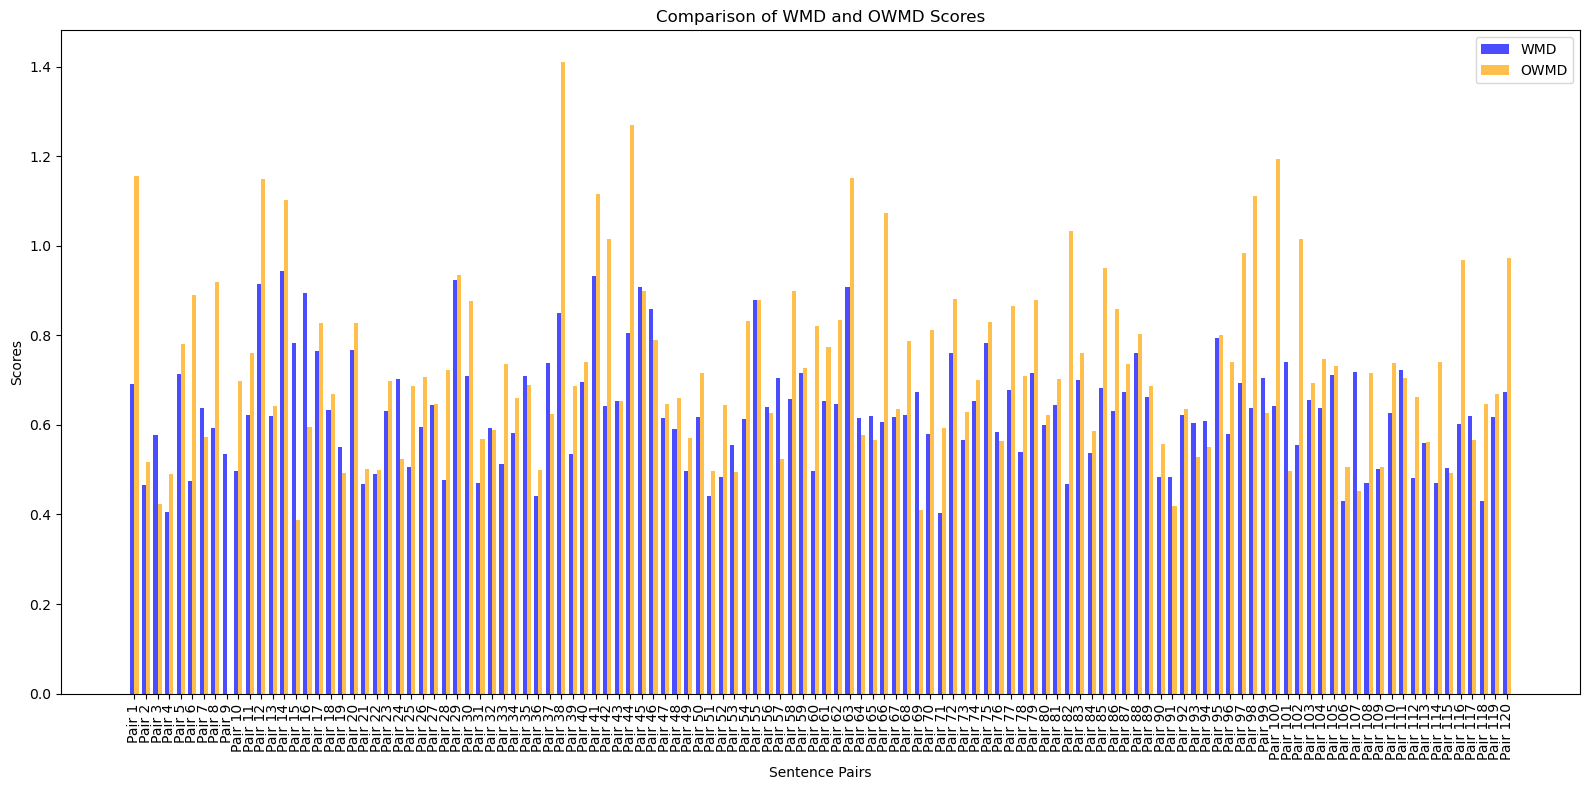

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
wmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\Bengali_wmd.txt'
owmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\Bengali_owmd.txt'

# Extracting WMD scores from the WMD file
wmd_scores = []
with open(wmd_file_path, 'r', encoding='utf-8') as wmd_file:
    for line in wmd_file:
        if "Word Mover's Distance:" in line:
            score = float(line.split(":")[1].strip())
            wmd_scores.append(score)

# Extracting OWMD scores from the OWMD file
owmd_scores = []
with open(owmd_file_path, 'r', encoding='utf-8') as owmd_file:
    for line in owmd_file:
        if "Optimized Word Mover's Distance (OWMD):" in line:
            score = float(line.split(":")[1].strip())
            owmd_scores.append(score)

# Generating sentence pair labels
pairs = [f"Pair {i+1}" for i in range(len(wmd_scores))]

# X-axis positions for bars
x = np.arange(len(pairs))

# Bar width
bar_width = 0.35

# Create the bar graph
plt.figure(figsize=(16, 8))
plt.bar(x - bar_width/2, wmd_scores, bar_width, label='WMD', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, owmd_scores, bar_width, label='OWMD', color='orange', alpha=0.7)

# Add labels and title
plt.xlabel("Sentence Pairs")
plt.ylabel("Scores")
plt.title("Comparison of WMD and OWMD Scores")
plt.xticks(x, pairs, rotation=90)
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()


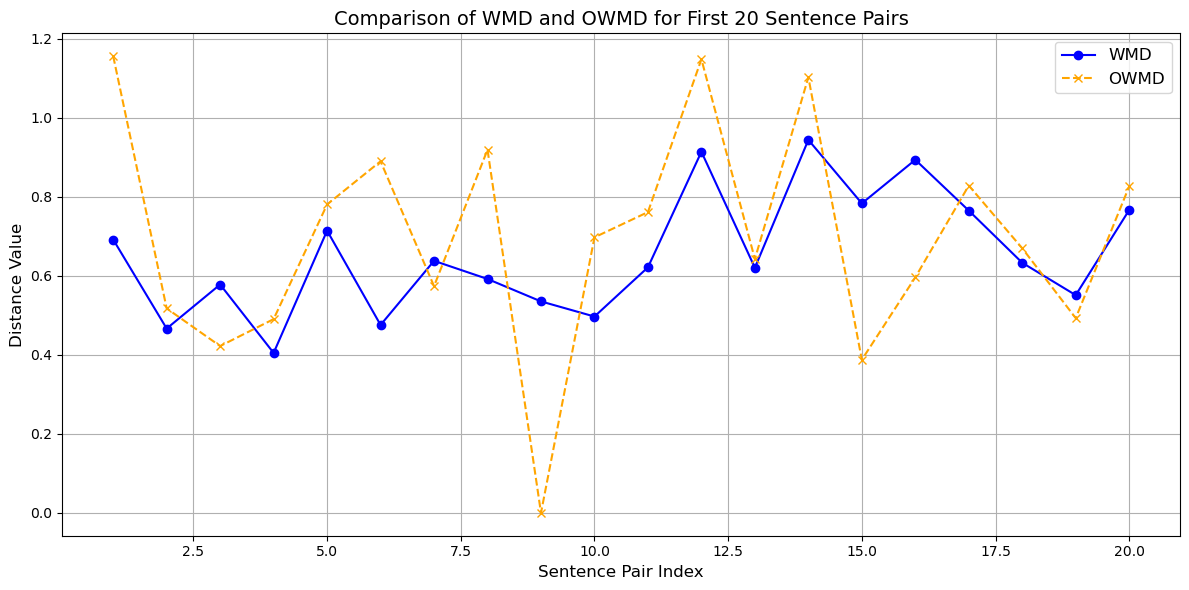

In [30]:
import matplotlib.pyplot as plt

# Data for the first 20 WMD scores (from paste.txt)
wmd_values = [
    0.6919, 0.4666, 0.5781, 0.4049, 0.7144,
    0.4757, 0.6380, 0.5921, 0.5353, 0.4970,
    0.6216, 0.9141, 0.6205, 0.9442, 0.7834,
    0.8938, 0.7652, 0.6331, 0.5512, 0.7667
]

# Data for the first 20 OWMD scores (from paste-2.txt)
owmd_values = [
    1.1561, 0.5176, 0.4223, 0.4905, 0.7807,
    0.8900, 0.5739, 0.9193, 0.0000, 0.6975,
    0.7614, 1.1483, 0.6426, 1.1026, 0.3877,
    0.5962, 0.8286, 0.6698, 0.4930, 0.8265
]

# Sentence pair indices
pairs = range(1, 21)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(pairs, wmd_values, label="WMD", marker='o', linestyle='-', color='blue')
plt.plot(pairs, owmd_values, label="OWMD", marker='x', linestyle='--', color='orange')

# Adding labels and title
plt.xlabel("Sentence Pair Index", fontsize=12)
plt.ylabel("Distance Value", fontsize=12)
plt.title("Comparison of WMD and OWMD for First 20 Sentence Pairs", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


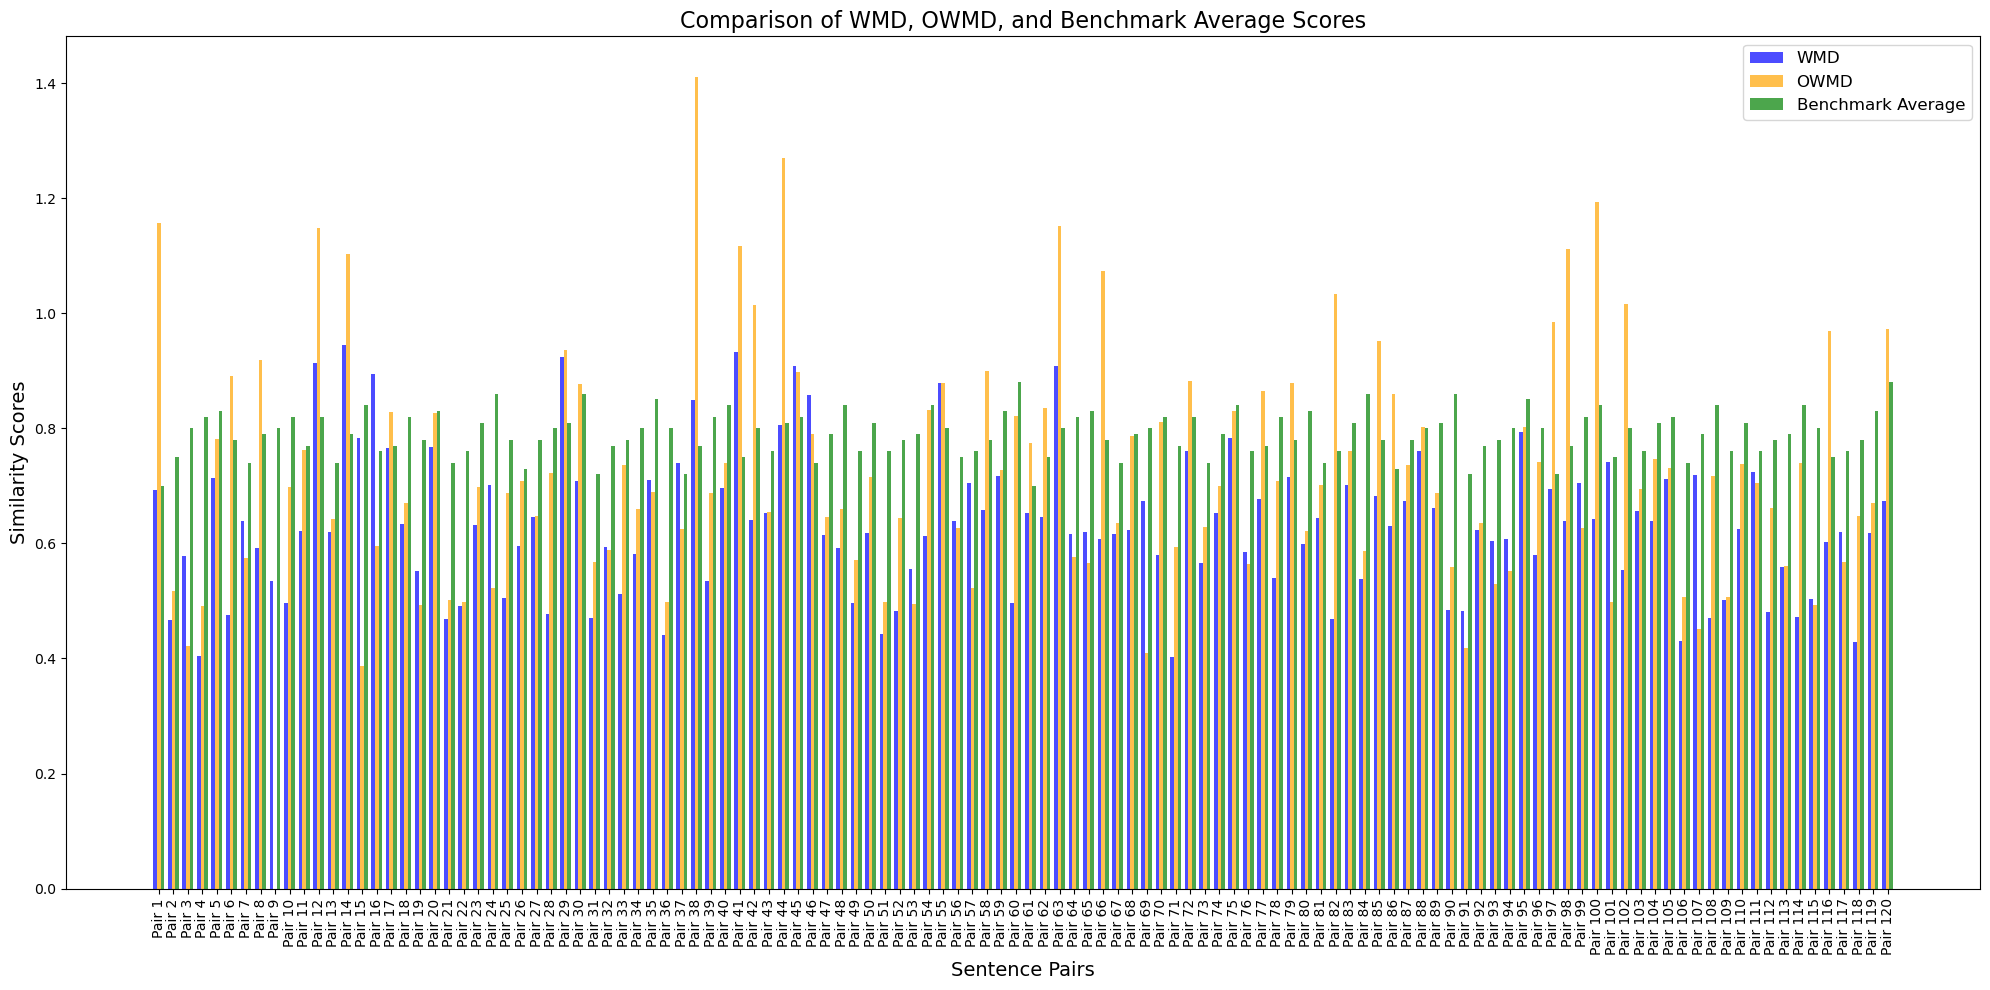

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
wmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\Bengali_wmd.txt'
owmd_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\Bengali_owmd.txt'
benchmark_file_path = r'C:\Users\KIIT\PycharmProjects\JupyterProject\data\Full_Bengali_Similarity_Scores.xlsx'

# Extracting WMD scores from the WMD file
wmd_scores = []
with open(wmd_file_path, 'r', encoding='utf-8') as wmd_file:
    for line in wmd_file:
        if "Word Mover's Distance:" in line:
            score = float(line.split(":")[1].strip())
            wmd_scores.append(score)

# Extracting OWMD scores from the OWMD file
owmd_scores = []
with open(owmd_file_path, 'r', encoding='utf-8') as owmd_file:
    for line in owmd_file:
        if "Optimized Word Mover's Distance (OWMD):" in line:
            score = float(line.split(":")[1].strip())
            owmd_scores.append(score)

# Load benchmark average scores from the Excel file
benchmark_data = pd.read_excel(benchmark_file_path)
benchmark_scores = benchmark_data['Average'].tolist()

# Ensure all lists have the same length
num_pairs = len(benchmark_scores)
wmd_scores = wmd_scores[:num_pairs]
owmd_scores = owmd_scores[:num_pairs]

# Generate sentence pair labels
pairs = [f"Pair {i+1}" for i in range(num_pairs)]

# Plotting
x = np.arange(num_pairs)  # X-axis positions
bar_width = 0.25

plt.figure(figsize=(20, 10))

# Bar plots for WMD, OWMD, and Benchmark Average
plt.bar(x - bar_width, wmd_scores, bar_width, label='WMD', color='blue', alpha=0.7)
plt.bar(x, owmd_scores, bar_width, label='OWMD', color='orange', alpha=0.7)
plt.bar(x + bar_width, benchmark_scores, bar_width, label='Benchmark Average', color='green', alpha=0.7)

# Add labels and title
plt.xlabel("Sentence Pairs", fontsize=14)
plt.ylabel("Similarity Scores", fontsize=14)
plt.title("Comparison of WMD, OWMD, and Benchmark Average Scores", fontsize=16)
plt.xticks(x, pairs, rotation=90)
plt.legend(fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()
